In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [57]:
datasetPm = '../data/PAQI_opendata_till_2019.csv' #'../data/airportdata.csv'

In [58]:
#dataPort = pd.read_csv(datasetAirPort)
dataset = pd.read_csv(datasetPm)
#dataPort.info()
print('rows:  ', len(dataset))
dataset.info()

rows:   391925
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391925 entries, 0 to 391924
Data columns (total 12 columns):
Source                   391925 non-null object
Serial                   208090 non-null object
City                     387960 non-null object
Station                  391925 non-null object
Latitude                 329048 non-null float64
Longitude                329048 non-null float64
Datetime (UTC+5)         391925 non-null object
PM2.5 (μg/m3)            391925 non-null float64
US AQI                   390369 non-null float64
CO2 (ppm)                187421 non-null float64
Temperature (°C)         343428 non-null float64
Relative Humidity (%)    343475 non-null float64
dtypes: float64(7), object(5)
memory usage: 35.9+ MB


In [59]:
dataset[dataset.City == "Karachi"].head()

,Source,Serial,City,Station,Latitude,Longitude,Datetime (UTC+5),PM2.5 (μg/m3),US AQI,CO2 (ppm),Temperature (°C),Relative Humidity (%)
14,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,10-6-16 14:00,24.0,76.0,502.0,30.0,78.0
15,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,10-6-16 15:00,22.0,72.0,420.0,30.0,76.0
16,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,10-6-16 17:00,21.0,70.0,416.0,30.0,76.0
17,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,10-6-16 18:00,22.0,72.0,416.0,28.0,80.0
18,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,10-6-16 19:00,23.0,74.0,415.0,28.0,80.0


In [60]:
dataset = dataset.drop_duplicates()
print(len(dataset))

dataset.columns
dataset.columns = ['Source', 'Serial', 'City', 'Station', 'Latitude', 'Longitude',
       'Datetime', 'PM', 'USAQI', 'CO2',
       'Temperature', 'RelativeHumidity']


391925


In [83]:
print(dataset[dataset.City.isna()].Station.unique())

ds = dataset[dataset.Station != 'air warrior'].copy()
print(len(ds))

ds.isna().sum()

['air warrior' 'al-farooq school' 'ayesha manzil' 'dawood public school'
 'liaquatabad']
391917


Source                   0
Serial              183835
City                  3957
Station                  0
Latitude             62869
Longitude            62869
Datetime                 0
PM                       0
USAQI                 1556
CO2                 204504
Temperature          48497
RelativeHumidity     48450
dtype: int64

In [85]:
print(ds[ds.City.isna()].Station.unique())

#ds.City = ds.City.fillna('Karachi')

serials = ds.Serial.unique()

print(serials)

for i in serials:
    if not pd.isnull(i):
        c = ds[ds.Serial == i].City.unique()
        
        assert (len(c) == 1) or (len(c) == 2 and pd.isnull(c[1]))
        
        ds.loc[ds[ds.Serial == i].index, 'City'] = c[0]

ds.City.isna().sum()

['al-farooq school' 'ayesha manzil' 'dawood public school' 'liaquatabad']
[nan '4ypxth4' 'rjpamt6' 'aj9xpaw' 'u7cwkla' 'kuh6xuc' 'crp4y7m' 'kxvyx76'
 'twa67s6' 'lllm4gm' 'ajgclt7' '997gv7h' 'a67pmak' 'tj4gawm' 'lwpu64p'
 'cpguxuc' 'yggpgpl' '4cvxlkt' 'm9cuxv7' 'sarpstt' 'tlxa6x7' 'skcaxvg'
 'hwcyky7' 'st-bff52f37f5e49558914d' 'st-4a42b11148c1749c9bb8'
 'st-1b4c8d5ed8220ebafd67' 'st-aa0ed0b1561de0a81c58' 'hcstgph' 'w6l4s9l']


0

In [91]:
ds[ds.Station == 'al-farooq school'].City.unique()

ds.isna().sum()

Source                   0
Serial              183835
City                     0
Station                  0
Latitude             62869
Longitude            62869
Datetime                 0
PM                       0
USAQI                 1556
CO2                 204504
Temperature          48497
RelativeHumidity     48450
dtype: int64

In [104]:

#dropcol = ['Latitude', 'Longitude']
#dataset.drop(dropcol, axis = 1, inplace = True)
dataset = ds.copy()

In [105]:
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
#dataset["Datetime"] = pd.to_datetime(dataset.valid)
#dataset.drop(["valid", "lon", "lat", "gust_mph", "peak_wind_gust_mph"], axis = 1,inplace=True)
#dataPort.drop(["latitude", "longitude", "Outdoor PM2.5", "OutdoorUSAQI", "FirstOnline"], axis = 1,inplace=True)
#dataPort["City"].fillna("Karachi", inplace = True)
#dataPort = dataPort[dataPort.City == "Karachi"]

In [106]:
dataset[dataset.City == "Karachi"].head()

,Source,Serial,City,Station,Latitude,Longitude,Datetime,PM,USAQI,CO2,Temperature,RelativeHumidity
14,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 14:00:00,24.0,76.0,502.0,30.0,78.0
15,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 15:00:00,22.0,72.0,420.0,30.0,76.0
16,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 17:00:00,21.0,70.0,416.0,30.0,76.0
17,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 18:00:00,22.0,72.0,416.0,28.0,80.0
18,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 19:00:00,23.0,74.0,415.0,28.0,80.0


In [107]:
dataset['weekday'] = dataset['Datetime'].dt.dayofweek
dataset['hour'] = dataset.Datetime.dt.hour
dataset['month'] = dataset.Datetime.dt.month
dataset['year'] = dataset.Datetime.dt.year
dataset['dayofmonth'] = dataset.Datetime.dt.day

In [108]:
print(len(dataset))
dataset.drop_duplicates(inplace = True)
print(len(dataset))

391917
391917


In [109]:
dataset[dataset.City == 'Karachi'].head()

,Source,Serial,City,Station,Latitude,Longitude,Datetime,PM,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth
14,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 14:00:00,24.0,76.0,502.0,30.0,78.0,3,14,10,2016,6
15,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 15:00:00,22.0,72.0,420.0,30.0,76.0,3,15,10,2016,6
16,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 17:00:00,21.0,70.0,416.0,30.0,76.0,3,17,10,2016,6
17,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 18:00:00,22.0,72.0,416.0,28.0,80.0,3,18,10,2016,6
18,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-06 19:00:00,23.0,74.0,415.0,28.0,80.0,3,19,10,2016,6


In [101]:
dataset.sort_values(by=['Datetime'])
dataset.head()

,Source,Serial,City,Station,Latitude,Longitude,Datetime,PM,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth
0,EPD,NaN,Lahore,Quaid-e-azam Township,NaN,NaN,2014-07-31,94.335,NaN,NaN,NaN,NaN,3,0,7,2014,31
1,EPD,NaN,Lahore,Town Hall,NaN,NaN,2014-07-31,93.620,NaN,NaN,NaN,NaN,3,0,7,2014,31
2,EPD,NaN,Lahore,Town Hall,NaN,NaN,2014-08-31,57.700,NaN,NaN,NaN,NaN,6,0,8,2014,31
3,EPD,NaN,Lahore,Quaid-e-azam Township,NaN,NaN,2014-09-30,151.000,NaN,NaN,NaN,NaN,1,0,9,2014,30
4,EPD,NaN,Lahore,Town Hall,NaN,NaN,2014-09-30,49.540,NaN,NaN,NaN,NaN,1,0,9,2014,30


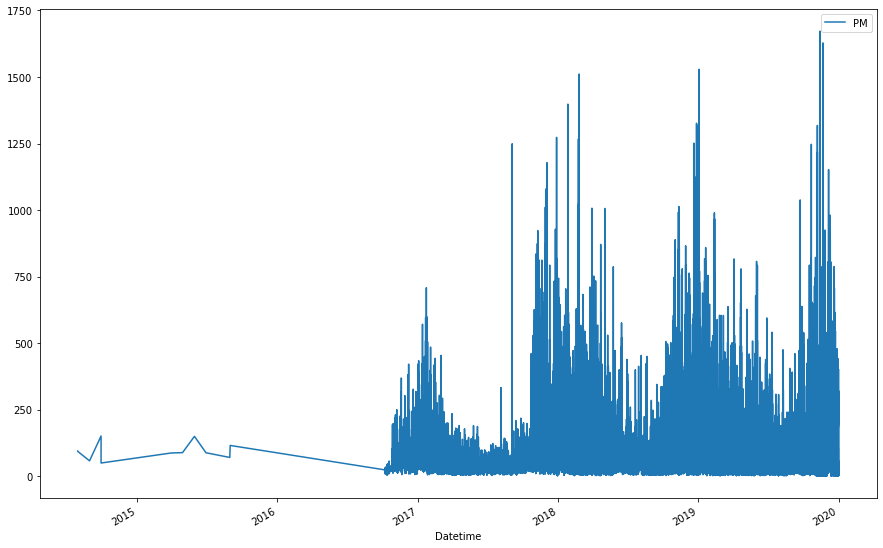

In [100]:
ax = plt.gca()
ax.figure.set_size_inches((15,10))

dataset.plot('Datetime', 'PM', ax = ax)

In [17]:
d2 = dataset[dataset.year >= 2017]



146196


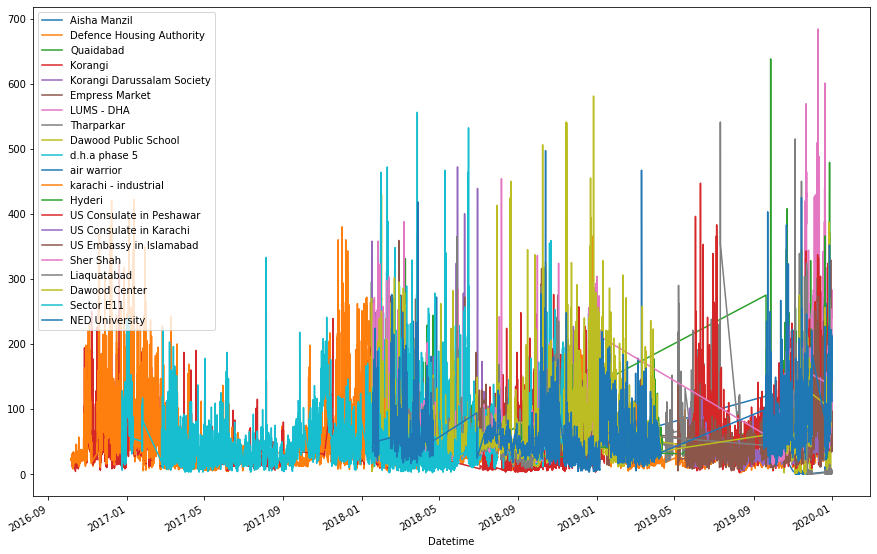

In [18]:
ax = plt.gca()
ax.figure.set_size_inches((15,10))

df_new = d2.groupby("Serial")

secure = []
for i, k in df_new:
    if (k.PM <= 700).all():
        secure.append(i)

d3 = dataset[dataset.Serial.isin(secure)]
print(len(d3))

df_new = d3.groupby('Serial')

lis  = []
names = []

for i, k in df_new:
#    if k.Name.iloc[0] not in ('mt khan road', 'aishamanzil', 'orangi town', 'd.h.a phase 5'):
        k.plot('Datetime', 'PM', label = k.Station.iloc[0], ax = ax)
        lis.append(k[['PM', 'Datetime']].set_index('Datetime'))
        names.append(k['Station'].iloc[0])
plt.show()
        

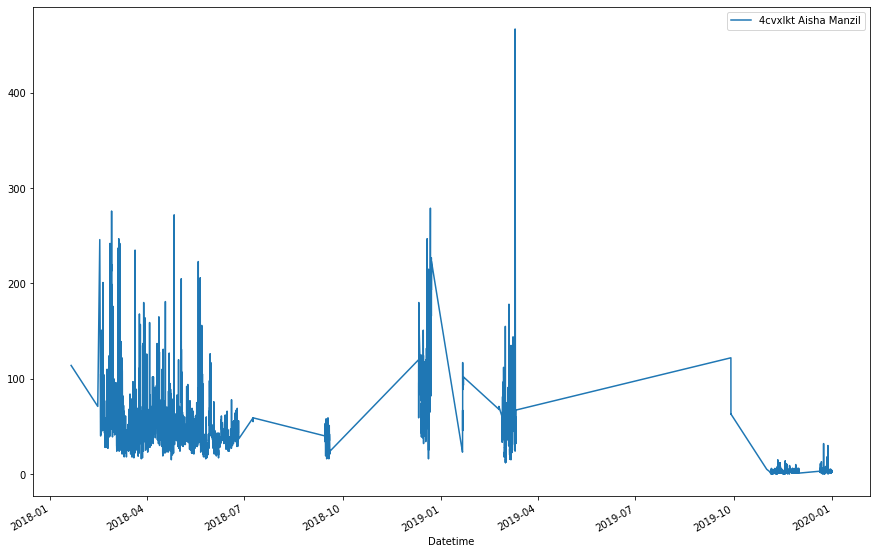

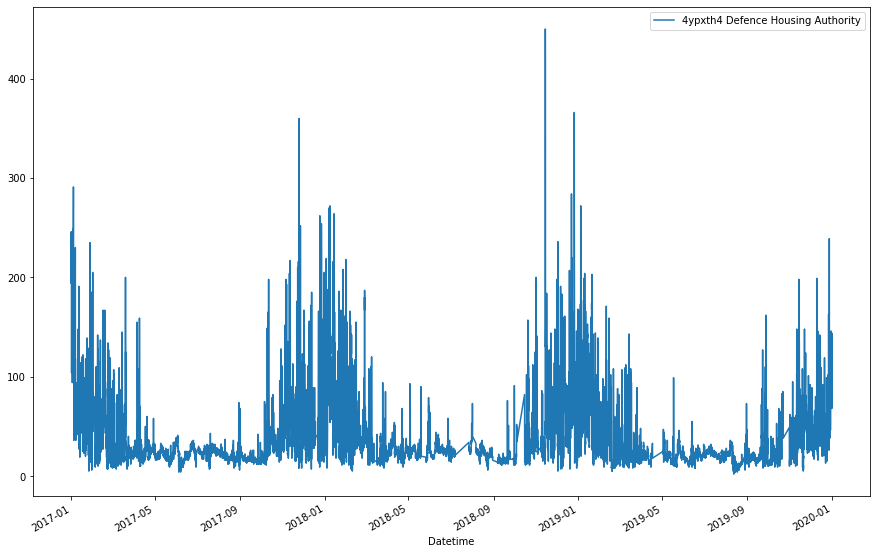

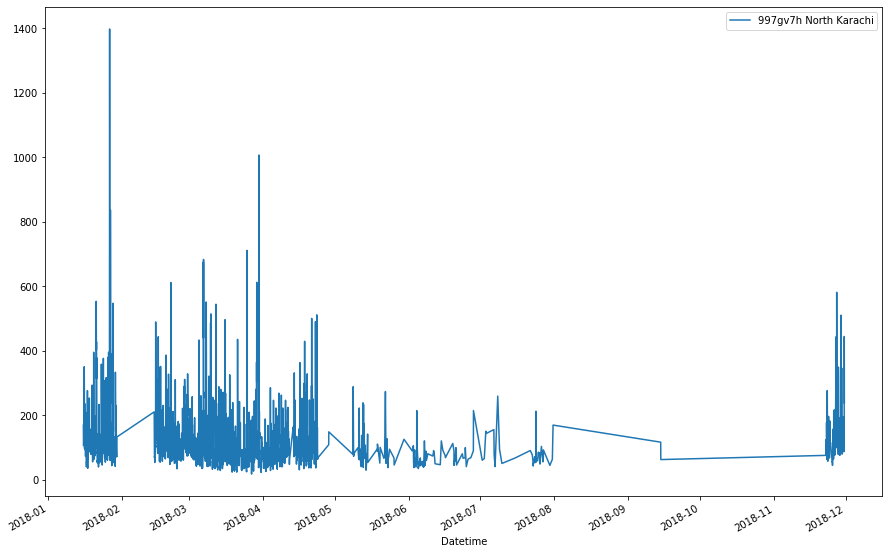

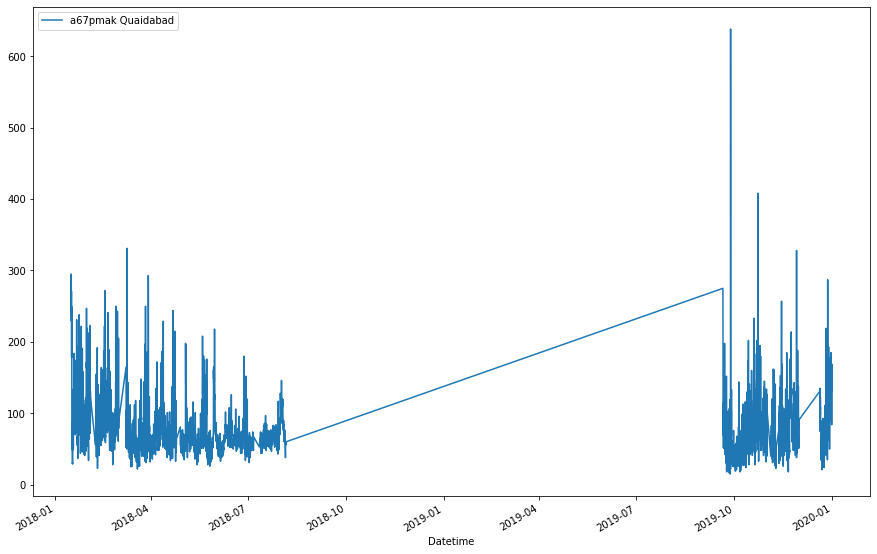

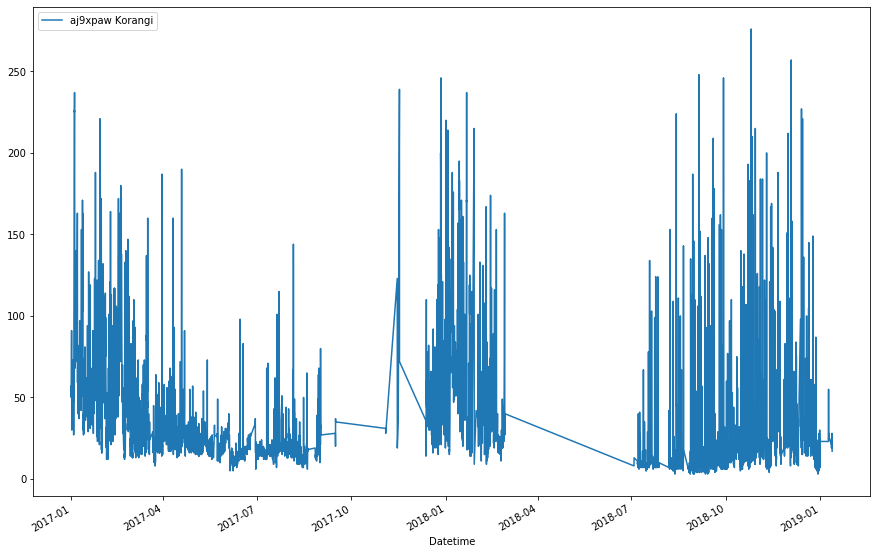

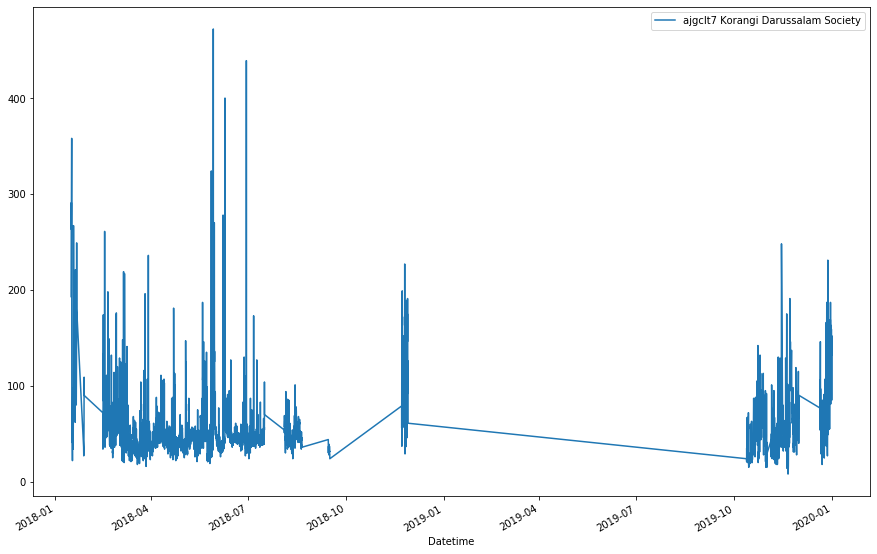

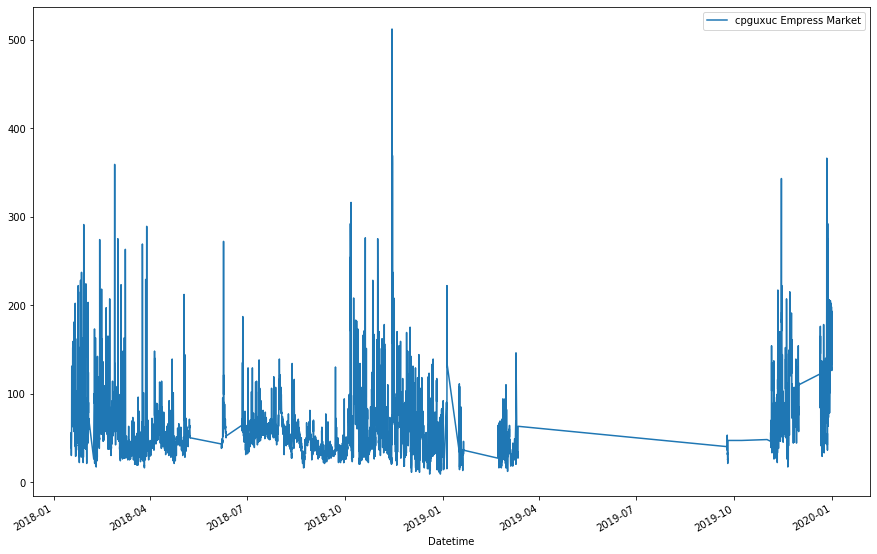

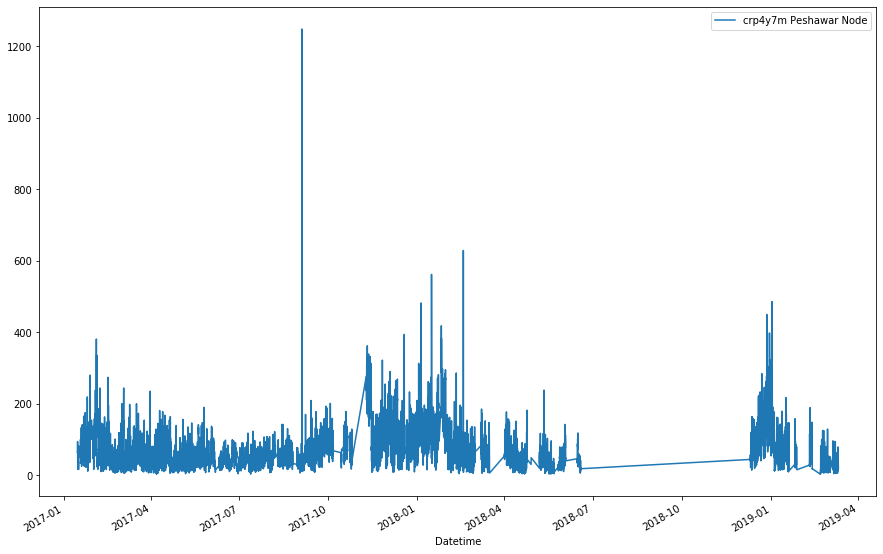

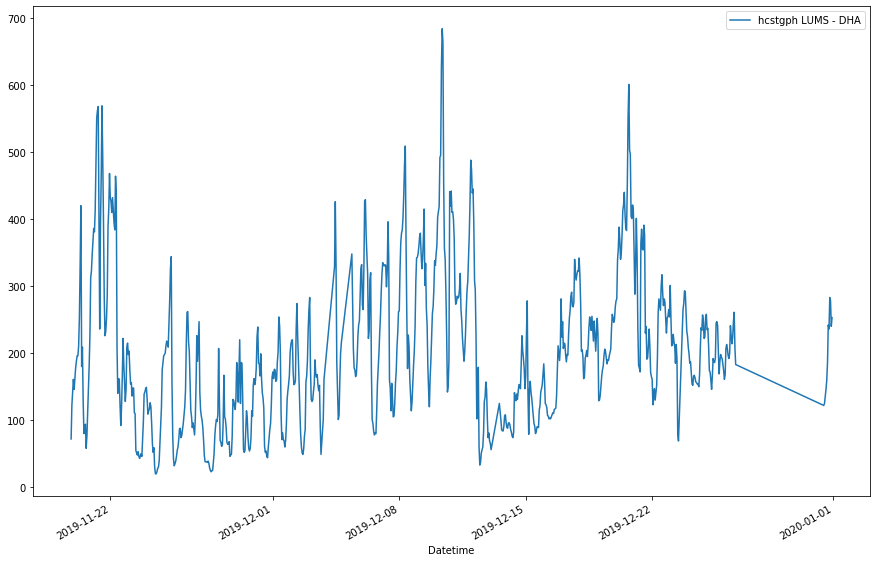

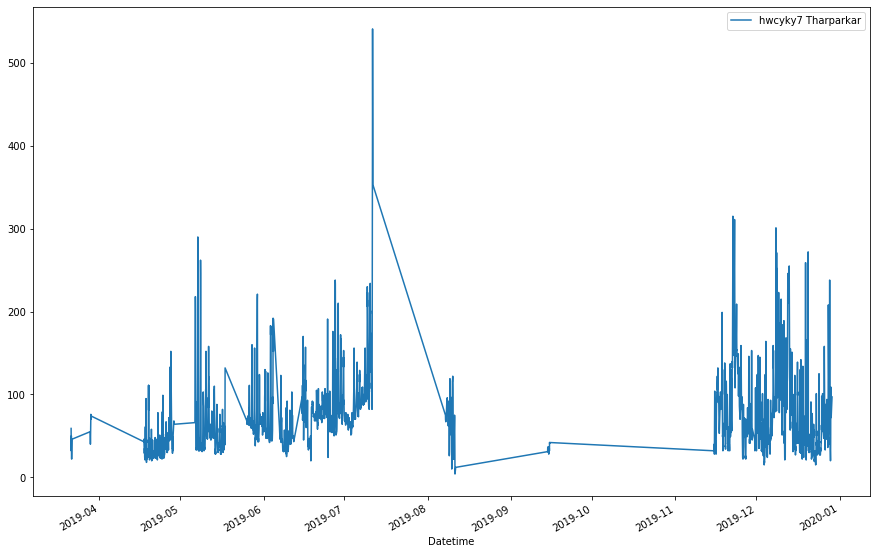

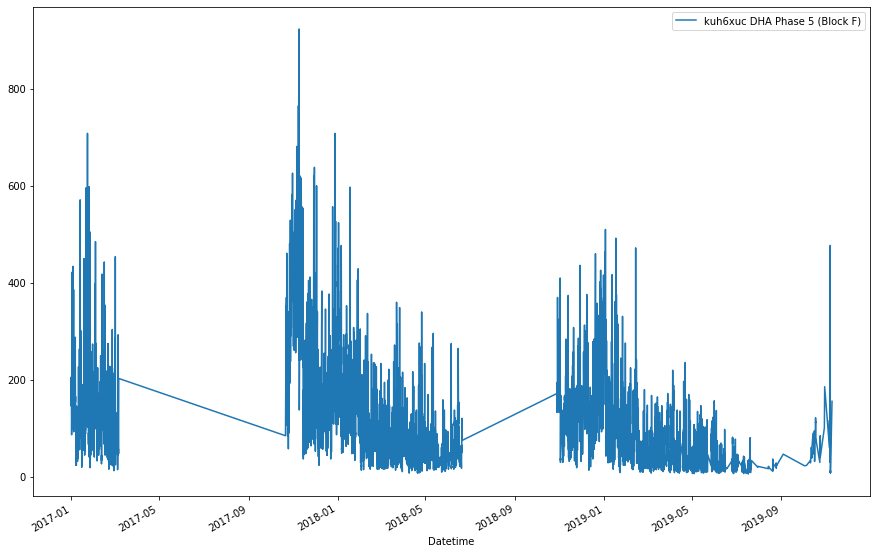

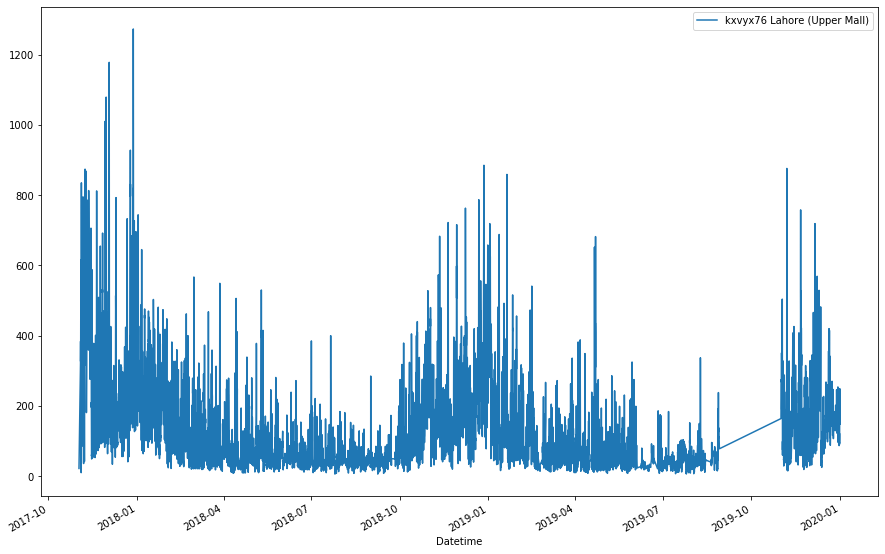

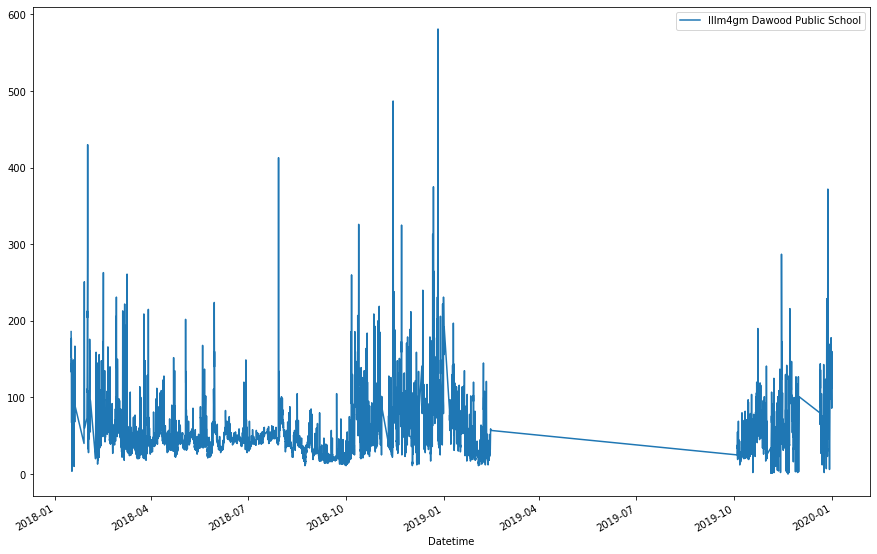

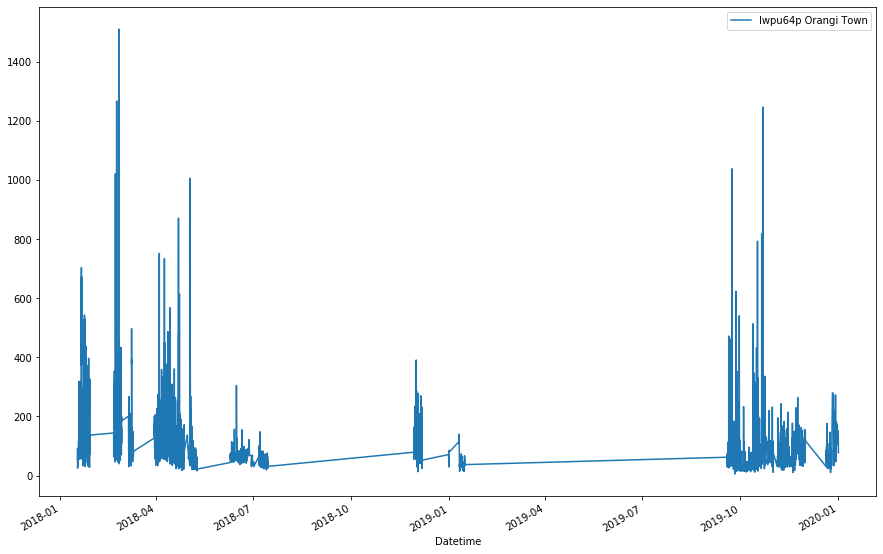

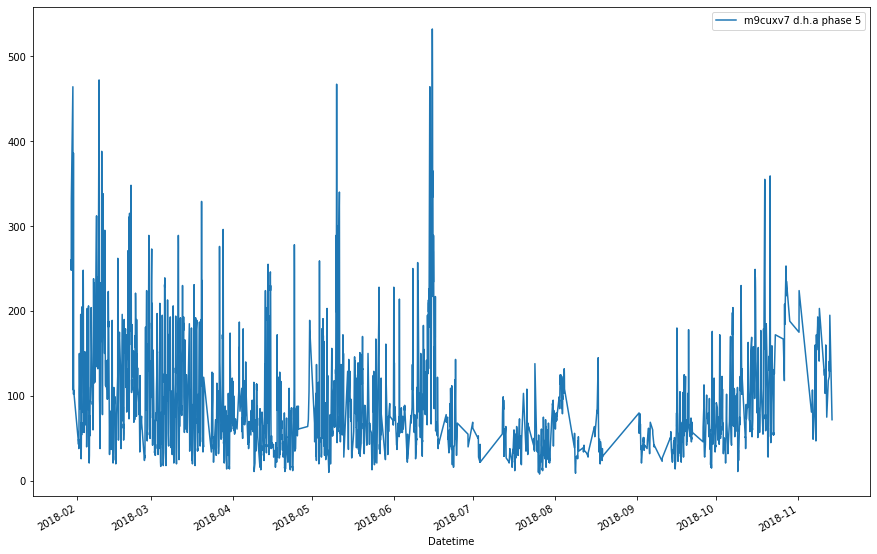

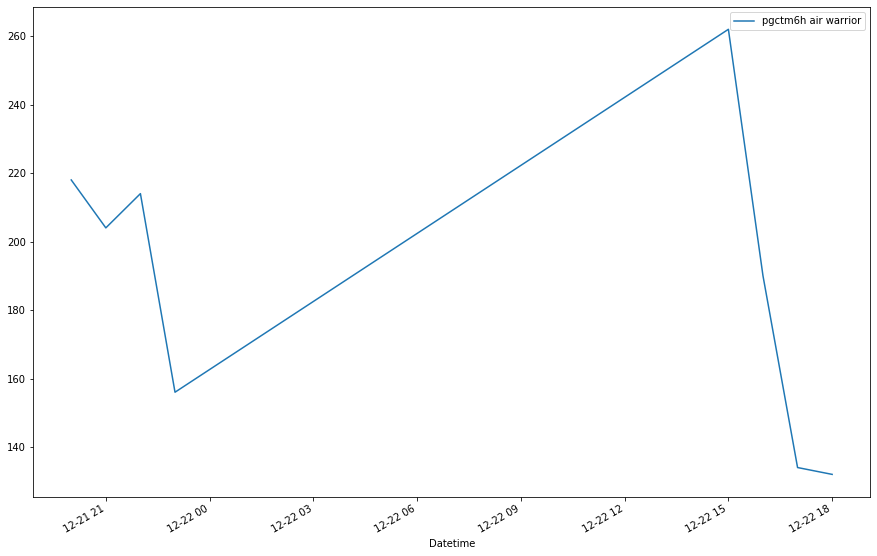

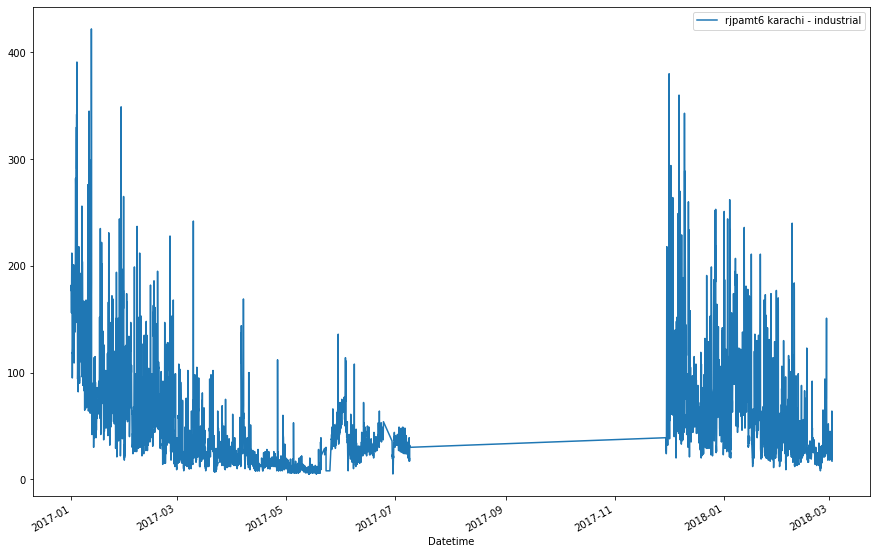

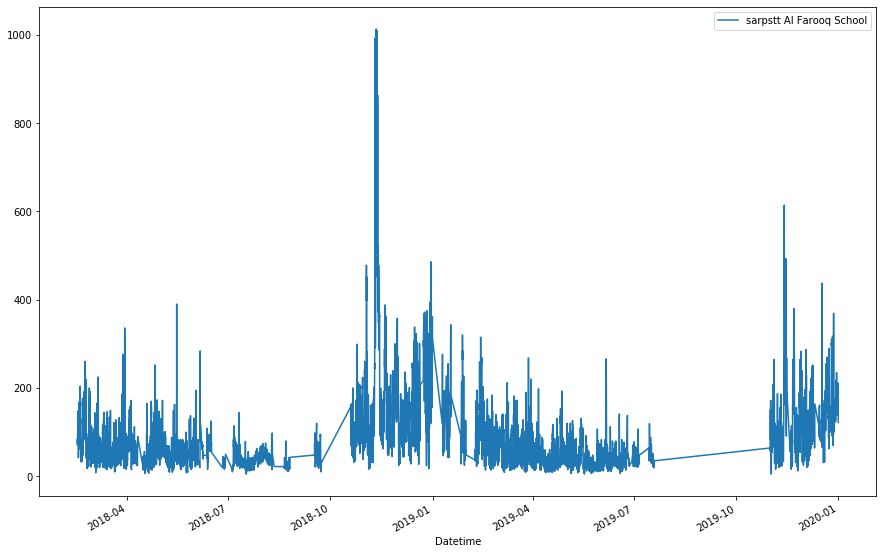

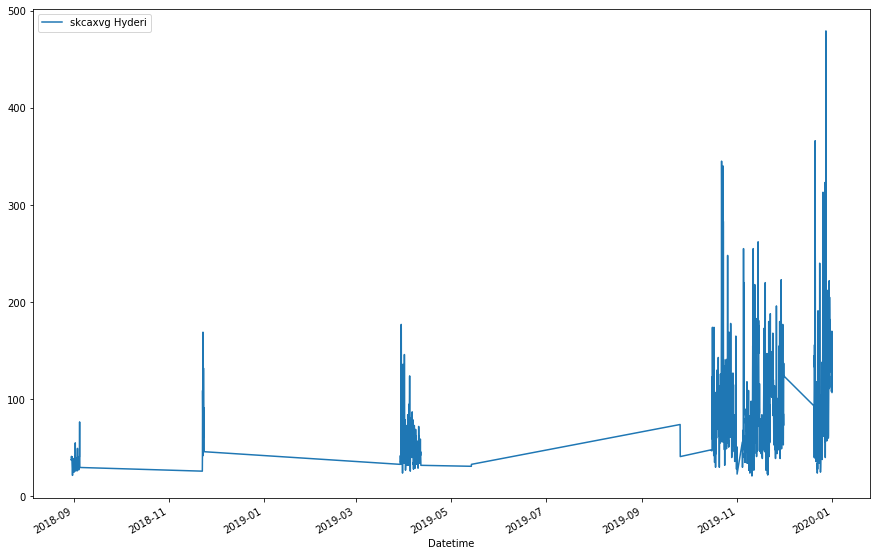

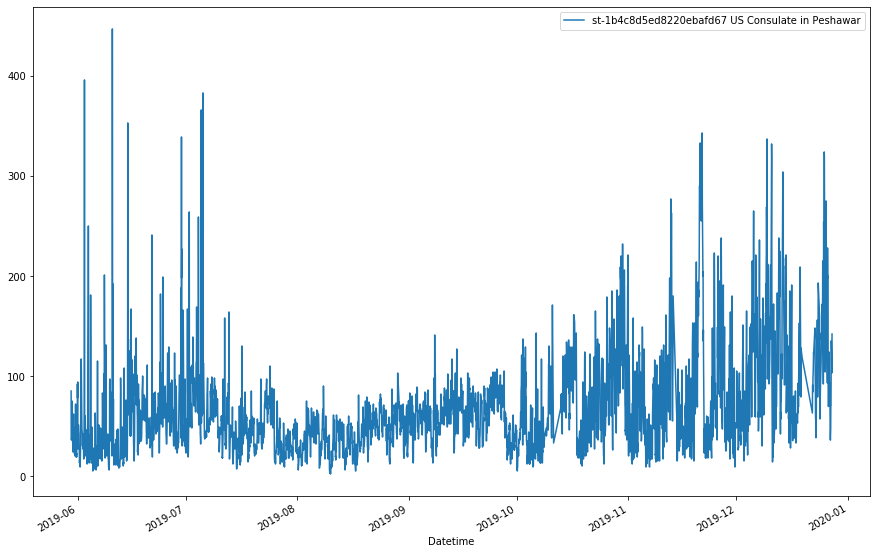

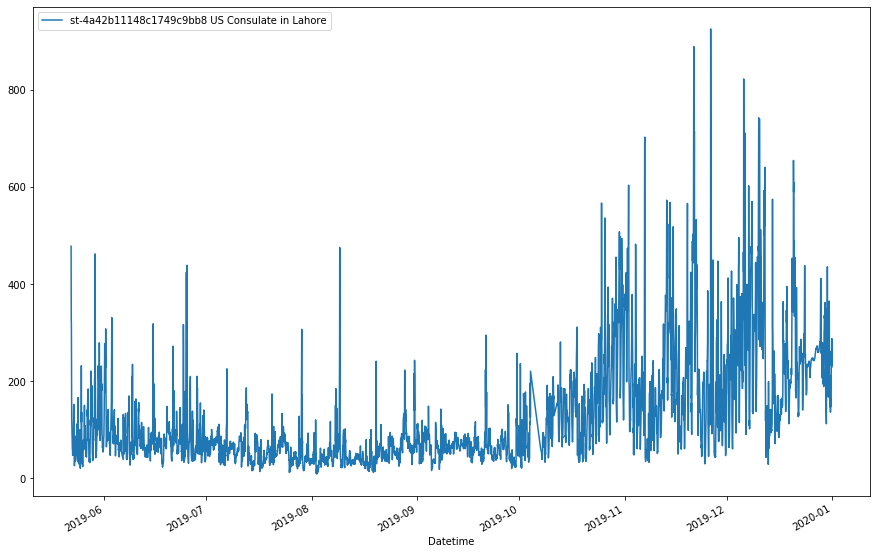

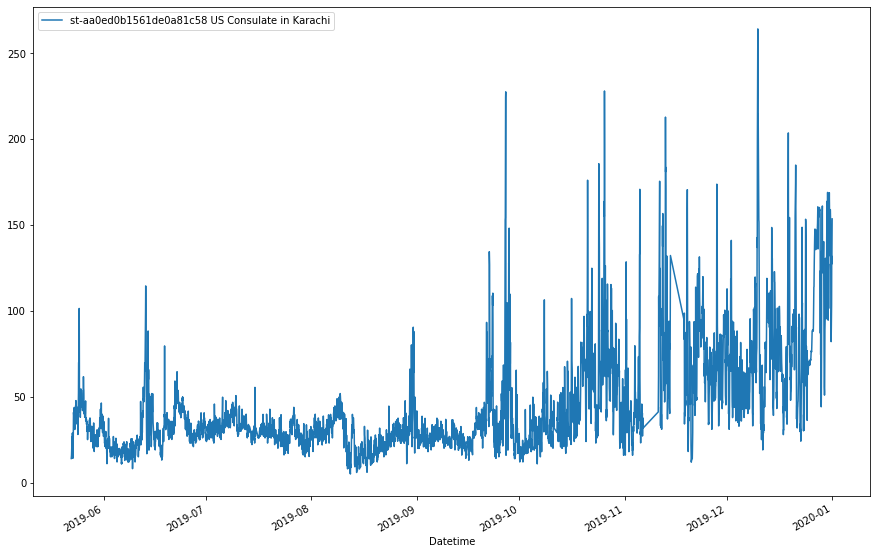

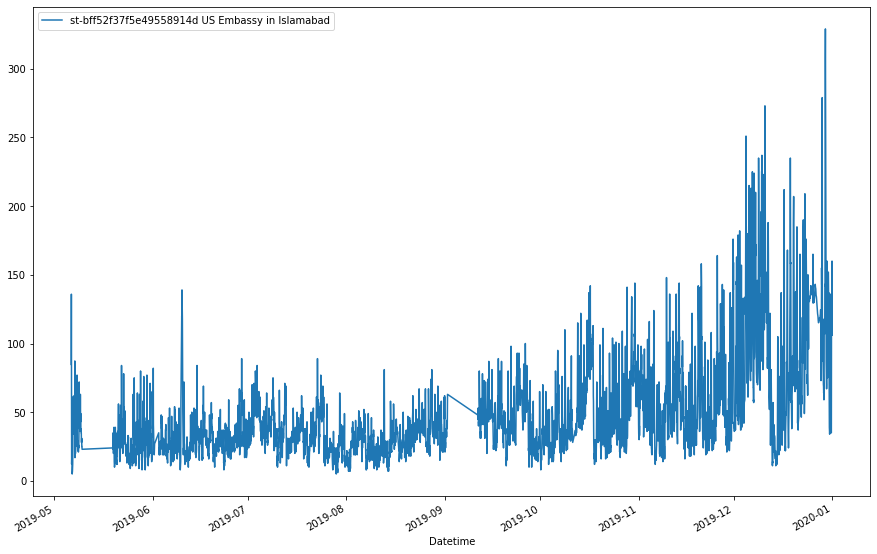

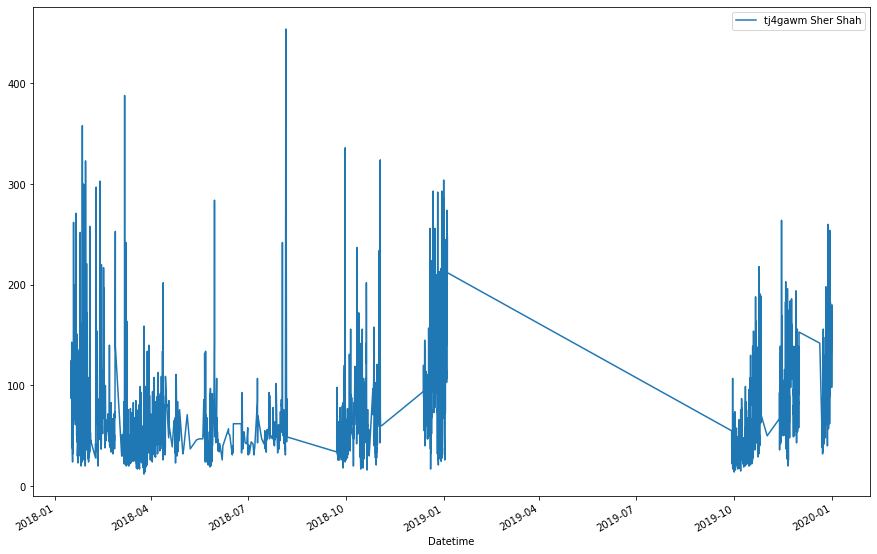

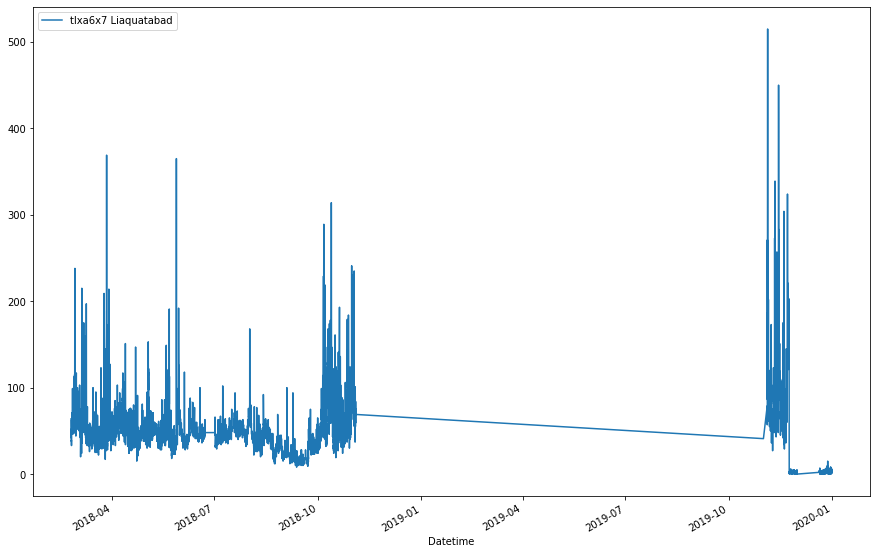

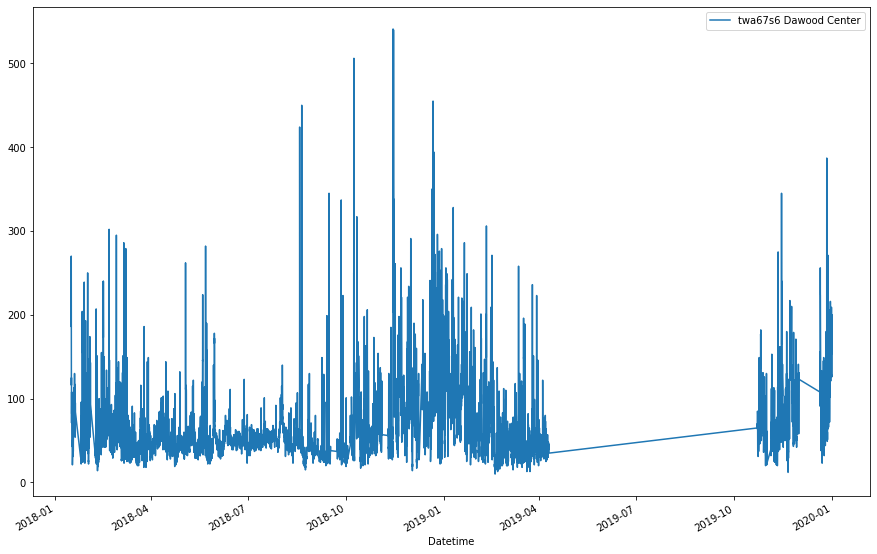

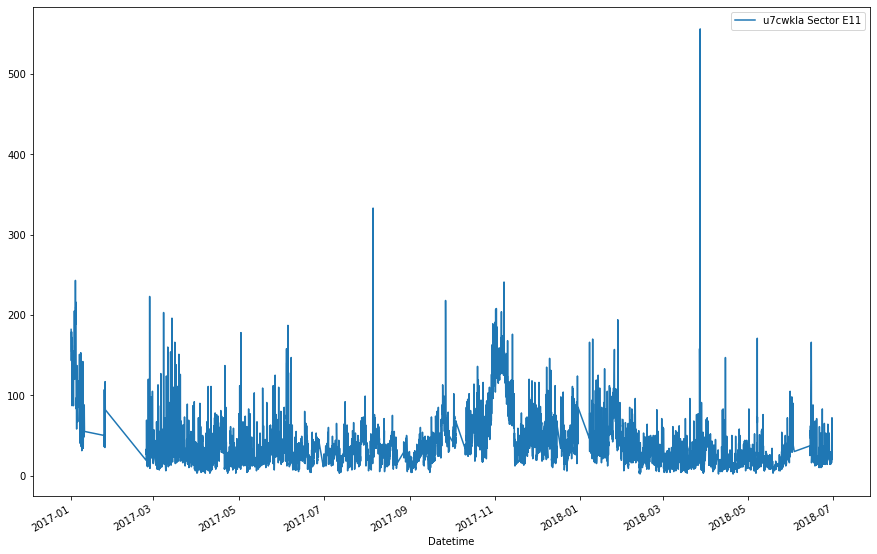

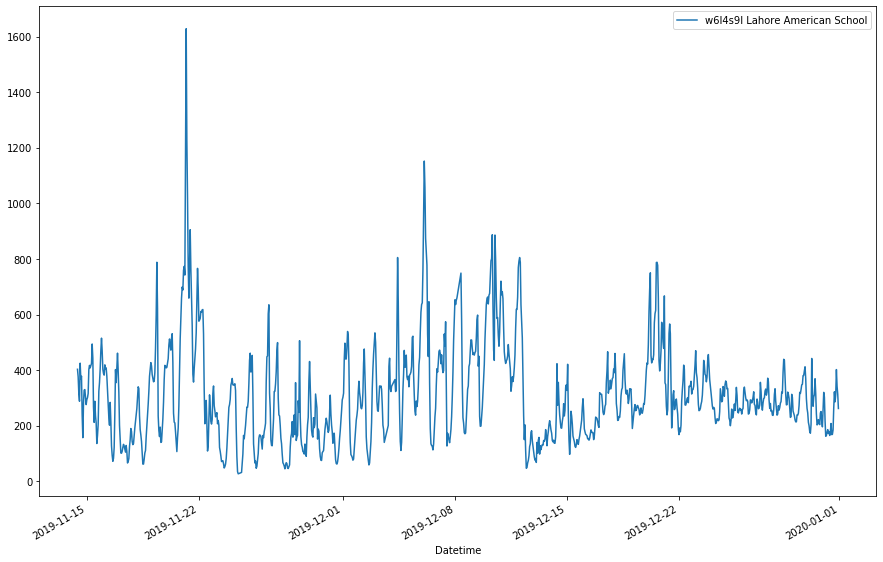

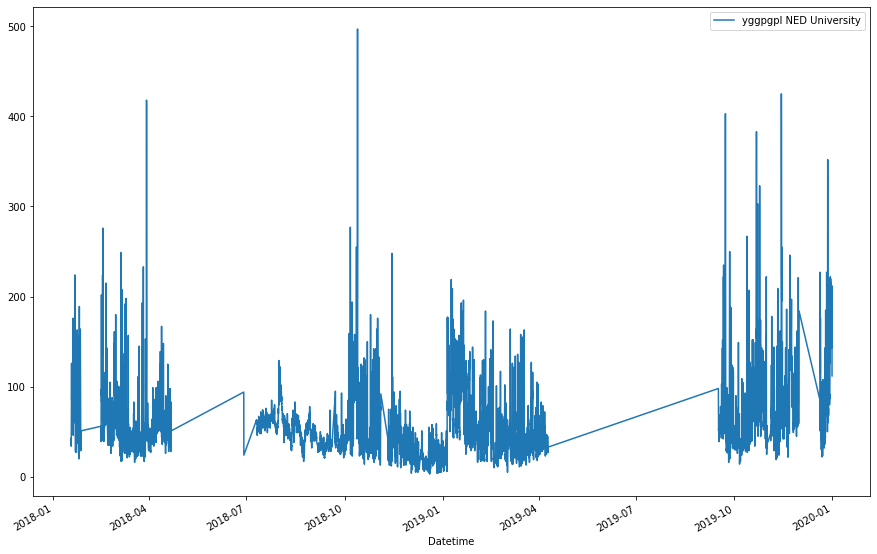

In [26]:

for i, k in d2.groupby("Serial"):
#    if k.Name.iloc[0] not in ('mt khan road', 'aishamanzil', 'orangi town', 'd.h.a phase 5'):
        ax = plt.gca()
        ax.figure.set_size_inches((15,10))
        k.plot('Datetime', 'PM', label = i + " " + k.Station.iloc[0], ax = ax)
        plt.show()
        


In [20]:

datananimpute = dataset.copy()

datananimpute.PM = (datananimpute.PM <= 700) * datananimpute.PM
datananimpute.PM.replace(0, np.nan, inplace = True)

datananimpute[datananimpute.City == 'Karachi']


,Source,Serial,City,Station,Datetime,PM,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth
14,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 14:00:00,24.0,76.0,502.0,30.0,78.0,3,14,10,2016,6
15,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 15:00:00,22.0,72.0,420.0,30.0,76.0,3,15,10,2016,6
16,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 17:00:00,21.0,70.0,416.0,30.0,76.0,3,17,10,2016,6
17,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 18:00:00,22.0,72.0,416.0,28.0,80.0,3,18,10,2016,6
18,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 19:00:00,23.0,74.0,415.0,28.0,80.0,3,19,10,2016,6
19,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 20:00:00,22.0,72.0,415.0,28.0,81.0,3,20,10,2016,6
20,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 21:00:00,21.0,70.0,415.0,28.0,81.0,3,21,10,2016,6
21,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 22:00:00,21.0,70.0,414.0,28.0,81.0,3,22,10,2016,6
22,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-06 23:00:00,22.0,72.0,415.0,28.0,81.0,3,23,10,2016,6
23,PAQI,4ypxth4,Karachi,Defence Housing Authority,2016-10-07 00:00:00,22.0,72.0,415.0,28.0,81.0,4,0,10,2016,7


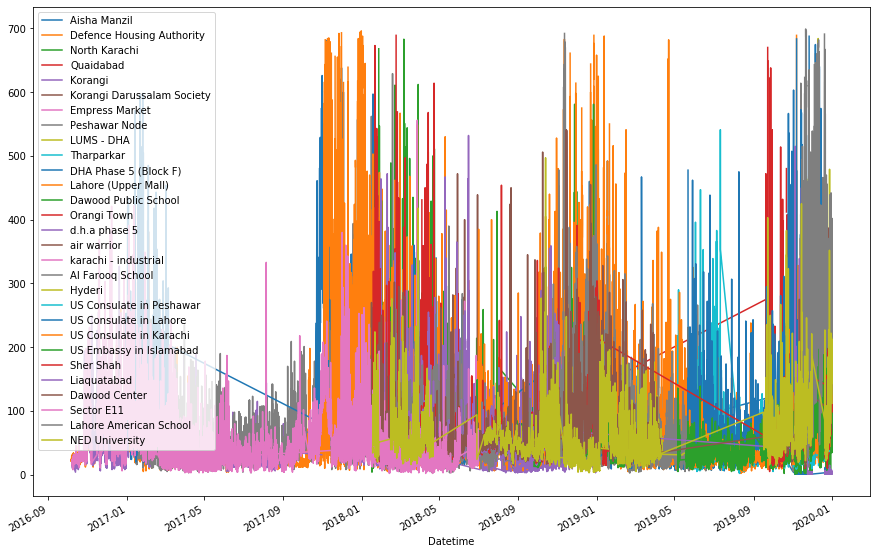

In [21]:
lis  = []
names = []

ax = plt.gca()
ax.figure.set_size_inches((15,10))

for i, k in datananimpute.groupby('Serial'):
#    if k.Name.iloc[0] not in ('mt khan road', 'aishamanzil', 'orangi town', 'd.h.a phase 5'):
        k.plot('Datetime', 'PM', label = k.Station.iloc[0], ax = ax)
        lis.append(k[['PM', 'Datetime']].set_index('Datetime'))
        names.append(k['Station'].iloc[0])


In [22]:
print(len(datananimpute))
datasmall = datananimpute.dropna()
print(len(datasmall))

dataothersmall = datananimpute.dropna(subset = ['PM'])
print(len((dataothersmall)))

datananimpute.isna().mean() * 100

391925
183195
391214


Source               0.000000
Serial              46.905658
City                 1.011673
Station              0.000000
Datetime             0.000000
PM                   0.181412
USAQI                0.397015
CO2                 52.179371
Temperature         12.374051
RelativeHumidity    12.362059
weekday              0.000000
hour                 0.000000
month                0.000000
year                 0.000000
dayofmonth           0.000000
dtype: float64

In [112]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 391917 entries, 0 to 391924
Data columns (total 17 columns):
Source              391917 non-null object
Serial              208082 non-null object
City                391917 non-null object
Station             391917 non-null object
Latitude            329048 non-null float64
Longitude           329048 non-null float64
Datetime            391917 non-null datetime64[ns]
PM                  391917 non-null float64
USAQI               390361 non-null float64
CO2                 187413 non-null float64
Temperature         343420 non-null float64
RelativeHumidity    343467 non-null float64
weekday             391917 non-null int64
hour                391917 non-null int64
month               391917 non-null int64
year                391917 non-null int64
dayofmonth          391917 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(4)
memory usage: 53.8+ MB


In [113]:
dataset.head()

,Source,Serial,City,Station,Latitude,Longitude,Datetime,PM,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth
0,EPD,NaN,Lahore,Quaid-e-azam Township,NaN,NaN,2014-07-31,94.335,NaN,NaN,NaN,NaN,3,0,7,2014,31
1,EPD,NaN,Lahore,Town Hall,NaN,NaN,2014-07-31,93.620,NaN,NaN,NaN,NaN,3,0,7,2014,31
2,EPD,NaN,Lahore,Town Hall,NaN,NaN,2014-08-31,57.700,NaN,NaN,NaN,NaN,6,0,8,2014,31
3,EPD,NaN,Lahore,Quaid-e-azam Township,NaN,NaN,2014-09-30,151.000,NaN,NaN,NaN,NaN,1,0,9,2014,30
4,EPD,NaN,Lahore,Town Hall,NaN,NaN,2014-09-30,49.540,NaN,NaN,NaN,NaN,1,0,9,2014,30


In [118]:
dataPort = pd.read_csv('../data/airportdata.csv')

#dataPort = dataPort[dataPort.year.isin([2017, 2018])]
dataPort.head()

,station,valid,lon,lat,tmpc,relh,drct,sped,vsby,gust_mph,peak_wind_gust_mph
0,OPPS,2016-10-20 00:00,71.5833,34.0167,20.0,68.35,230.0,4.60,2.49,NaN,NaN
1,OPKC,2016-10-20 00:55,67.1333,24.9000,25.0,83.44,250.0,6.90,3.11,NaN,NaN
2,OPPS,2016-10-20 01:00,71.5833,34.0167,20.0,72.92,310.0,6.90,2.49,NaN,NaN
3,OPKC,2016-10-20 01:25,67.1333,24.9000,25.0,83.44,240.0,5.75,2.49,NaN,NaN
4,OPKC,2016-10-20 01:55,67.1333,24.9000,25.0,83.44,250.0,6.90,2.49,NaN,NaN


In [119]:
dataset.City.unique()

array(['Lahore', 'Karachi', 'Islamabad', 'Peshawar', 'Chakwal',
       'Faisalabad', 'Gujranwala', 'Bahawalpur', 'Rawalpindi', 'Muridke',
       'Raiwind', 'Diplo', 'Sialkot'], dtype=object)

In [154]:
print([i for  i,j in dataPort.groupby(['station', 'lon', 'lat'])])

dic = {'OPKC': 'Karachi', 'OPFA': 'Faisalabad', 'OPLA': 'Lahore', 'OPRN':'Rawalpindi', 'OPPS':'Peshawar'}

city_names = set([j for j in dic.values()])

assert not (city_names - set(dataset.City.unique()))

names = dataPort.station.apply(lambda x: dic[x])
dataPort['names'] = names

drop_col = ['gust_mph', 'peak_wind_gust_mph', 'station', 'lon', 'lat']
dp = dataPort.drop(drop_col, axis = 1)

dp.head()

[('OPFA', 72.9948, 31.365), ('OPKC', 67.1333, 24.9), ('OPLA', 74.4036, 31.5216), ('OPPS', 71.5833, 34.0167), ('OPRN', 73.0992, 33.6166)]


,valid,tmpc,relh,drct,sped,vsby,names
0,2016-10-20 00:00,20.0,68.35,230.0,4.60,2.49,Peshawar
1,2016-10-20 00:55,25.0,83.44,250.0,6.90,3.11,Karachi
2,2016-10-20 01:00,20.0,72.92,310.0,6.90,2.49,Peshawar
3,2016-10-20 01:25,25.0,83.44,240.0,5.75,2.49,Karachi
4,2016-10-20 01:55,25.0,83.44,250.0,6.90,2.49,Karachi


In [166]:
dates = pd.to_datetime(dp.valid)
dates = dates.dt.round('H')

dp['datetime'] = dates
dp2 = dp.drop('valid', axis = 1)

dp2.head()

,tmpc,relh,drct,sped,vsby,names,datetime
0,20.0,68.35,230.0,4.60,2.49,Peshawar,2016-10-20 00:00:00
1,25.0,83.44,250.0,6.90,3.11,Karachi,2016-10-20 01:00:00
2,20.0,72.92,310.0,6.90,2.49,Peshawar,2016-10-20 01:00:00
3,25.0,83.44,240.0,5.75,2.49,Karachi,2016-10-20 01:00:00
4,25.0,83.44,250.0,6.90,2.49,Karachi,2016-10-20 02:00:00


In [165]:
print(dp2[dp2.names == "Karachi"].head(n = 2))

dp3 = dp2.groupby(['names', 'datetime']).mean().reset_index()

dp3.head()

   tmpc   relh   drct  sped  vsby    names            datetime
1  25.0  83.44  250.0  6.90  3.11  Karachi 2016-10-20 01:00:00
3  25.0  83.44  240.0  5.75  2.49  Karachi 2016-10-20 01:00:00


,names,datetime,tmpc,relh,drct,sped,vsby
0,Faisalabad,2016-10-30 12:00:00,27.0,44.80,50.0,4.6,0.93
1,Faisalabad,2016-11-06 01:00:00,15.0,87.83,0.0,0.0,0.31
2,Faisalabad,2016-12-09 07:00:00,16.0,82.37,130.0,4.6,0.50
3,Faisalabad,2016-12-10 16:00:00,14.0,93.69,270.0,6.9,0.06
4,Faisalabad,2016-12-12 07:00:00,15.0,87.83,0.0,0.0,0.31


In [173]:
initial_len = len(dataset)

merged = dataset.merge(dp3, how = 'left', left_on = ['Datetime', 'City'], right_on = ['datetime', 'names'])

assert len(merged) == initial_len

merged[merged.names == "Karachi"].head()

,Source,Serial,City,Station,Latitude,Longitude,Datetime,PM,USAQI,CO2,...,month,year,dayofmonth,names,datetime,tmpc,relh,drct,sped,vsby
746,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-20 01:00:00,19.0,65.0,465.0,...,10,2016,20,Karachi,2016-10-20 01:00:00,25.0,83.440,245.0,6.325,2.80
747,PAQI,rjpamt6,Karachi,karachi - industrial,NaN,NaN,2016-10-20 01:00:00,21.0,70.0,415.0,...,10,2016,20,Karachi,2016-10-20 01:00:00,25.0,83.440,245.0,6.325,2.80
748,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-20 02:00:00,19.0,65.0,443.0,...,10,2016,20,Karachi,2016-10-20 02:00:00,25.5,83.495,245.0,8.050,2.49
749,PAQI,rjpamt6,Karachi,karachi - industrial,NaN,NaN,2016-10-20 02:00:00,20.0,68.0,414.0,...,10,2016,20,Karachi,2016-10-20 02:00:00,25.5,83.495,245.0,8.050,2.49
750,PAQI,4ypxth4,Karachi,Defence Housing Authority,24.818095,67.052941,2016-10-20 03:00:00,19.0,65.0,427.0,...,10,2016,20,Karachi,2016-10-20 03:00:00,26.0,78.620,230.0,11.500,2.49


In [ ]:
#final_merged_karachi_2017_2018.sort_values(by=["Datetime"], inplace = True)


In [ ]:
#final_merged_karachi_2017_2018_ = final_merged_karachi_2017_2018[final_merged_karachi_2017_2018.Datetime < pd.to_datetime('2018-09-01')]

In [ ]:
#final_merged_karachi_2017_2018_.to_csv('../data/finalKarachiDataMerged.csv', index=False)

In [ ]:
#s = final_merged_karachi_2017_2018_
#s.set_index("Datetime", inplace = True)
#s.sort_values("Datetime", ascending= False)


In [ ]:
#s = final_merged_karachi_2017_2018[final_merged_karachi_2017_2018.Datetime >= pd.to_datetime('2018-08-09')]
#s.set_index("Datetime")
#s.sort_values("Datetime")